In [1]:
import pickle
import tensorflow

In [2]:
tensorflow.__version__

'2.16.1'

In [3]:
import pandas as pd
from train_models import train_dl_model
from lstm import build_model, build_lstm  
from lstm import apply_model, custom_loss_msle, custom_loss_msle_slope

In [4]:
from preprocessing import get_nn_data

In [5]:
state = 'GO'

FILENAME_DATA = f'../data/dengue_{state}.csv.gz'

end_date = '2024-08-04'

In [6]:
HIDDEN = 64
LOOK_BACK = 12
PREDICT_N = 3

In [7]:
%%time 
df_ = pd.read_csv(FILENAME_DATA)

feat = df_.shape[1]-1

model = build_lstm(hidden=HIDDEN, features=feat, predict_n=PREDICT_N, look_back=LOOK_BACK,
                        batch_size=4, loss='mse', 
                optimizer = 'adam' )
    
train_dl_model(model, state, doenca='dengue',
                   end_date_train=None,
                   ratio = 1,
                   ini_date = '2015-01-01',
                   end_date = '2022-09-04',
                   plot=False, filename_data=FILENAME_DATA,
                   min_delta=0.001, label='macro_2022',
                   patience = 30, 
                   epochs=300,
                   batch_size=4,
                   predict_n=PREDICT_N,
                   look_back=LOOK_BACK)

/opt/homebrew/Caskroom/miniforge/base/envs/lstm_infodengue_sprint/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (4, 12, 21)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (4, 12, 64)            │        22,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (4, 12, 64)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (4, 12, 64)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (4, 12, 64)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (4, 64)                │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (4, 64)                │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (4, 3)                 │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 88,259 (344.76 KB)

 Trainable params: 88,259 (344.76 KB)

 Non-trainable params: 0 (0.00 B)

/Users/eduardoaraujo/Documents/Github/short_term_lstm/lstm/preprocessing.py:102: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  factor = max_features[target_col]


None
CPU times: user 19.4 s, sys: 1.34 s, total: 20.7 s
Wall time: 19.3 s


/Users/eduardoaraujo/Documents/Github/short_term_lstm/lstm/preprocessing.py:120: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  factor = max_features[target_col]


(464, 3, 100)


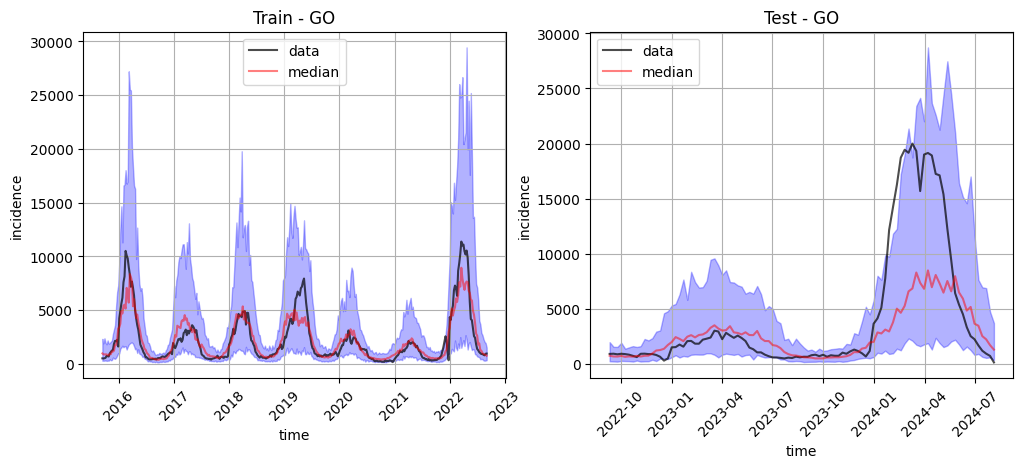

CPU times: user 10 s, sys: 1.64 s, total: 11.7 s
Wall time: 7.33 s


In [8]:
%%time 
end_date = '2024-08-04'
metrics1, metrics2 = apply_model(state, ini_date = '2015-06-01', 
                    end_date = end_date, look_back = LOOK_BACK, end_train_date = '2022-09-04', batch_size = 4, 
                    predict_n = PREDICT_N,  ratio = None,
                    label_pred= f'dengue_base',
                    model_name = f'trained_{state}_dengue_macro_2022', 
                    filename = f'../data/dengue_{state}.csv.gz', plot = True)

In [9]:
metrics1

,0,1,2
mean_absolute_error,8.332084e+02,8.976331e+02,1.000316e+03
explained_variance_score,7.184405e-01,6.912480e-01,6.042432e-01
mean_squared_error,3.724093e+06,3.990373e+06,5.155262e+06
mean_squared_log_error,1.556507e-01,1.818377e-01,2.165718e-01
median_absolute_error,2.905337e+02,3.420236e+02,3.735369e+02
r2_score,7.082195e-01,6.872939e-01,5.961164e-01


In [10]:
metrics2

,0,1,2
mean_absolute_error,1.894472e+03,2.068598e+03,2.344404e+03
explained_variance_score,6.384870e-01,5.980392e-01,4.837852e-01
mean_squared_error,1.416129e+07,1.545016e+07,2.017944e+07
mean_squared_log_error,2.783270e-01,3.251152e-01,4.312286e-01
median_absolute_error,4.406993e+02,6.618381e+02,7.769961e+02
r2_score,5.956124e-01,5.589672e-01,4.249080e-01


In [11]:
def get_preds(state, label): 
    with open(f'./predictions/lstm_{state}_dengue_{label}.pkl', 'rb') as file:
        data = pickle.load(file)

    data_test = pd.DataFrame()
    indice = data['indice']
    split_point = data['split_point']
    Ydata = data['target']
    df_predicted = data['pred']
    df_predicted25 = data['lb']
    df_predicted975 = data['ub']
    
    
    data_test['date'] =  indice[split_point + len(indice)-Ydata.shape[0]:]
    data_test['casos'] = Ydata[split_point:, -1]
    data_test['pred'] = df_predicted.iloc[split_point:,-1].values
    data_test['lower'] =  df_predicted25[df_predicted25.columns[-1]][split_point:].values
    data_test['upper'] = df_predicted975[df_predicted975.columns[-1]][split_point:].values
    
    return data_test

In [12]:
label = 'base'
data_test = get_preds(state, label)

In [13]:
from mosqlient.models.score import Scorer

In [14]:
score = Scorer(df_true = data_test[['date', 'casos']], pred = data_test[['date', 'lower', 'pred', 'upper']],
               confidence_level=0.95)

/opt/homebrew/Caskroom/miniforge/base/envs/lstm_infodengue_sprint/lib/python3.12/site-packages/mosqlient/models/score.py:354: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_true.date = pd.to_datetime(df_true.date)
/opt/homebrew/Caskroom/miniforge/base/envs/lstm_infodengue_sprint/lib/python3.12/site-packages/mosqlient/models/score.py:369: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred.date = pd.to_datetime(pred.date)


In [15]:
score.crps[1]['pred']

1753.007018667803